In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler

In [94]:
data = pd.read_csv('Orange_Telecom_Churn_Data.csv')

In [95]:
# Print each datatype from de dataframe

print(data.dtypes)

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object


In [96]:
# Identify categorical variables

categorical_vars = [
    x for x in data.columns if data[x].dtype=='object' or x == 'area_code'
]

print(categorical_vars)

['state', 'area_code', 'phone_number', 'intl_plan', 'voice_mail_plan']


In [97]:
# Verify how many distinct entries each categorical variable has got

for v in categorical_vars:
    print(v, "- Amount:", str(len(data[v].unique())))
    
    print(data[v].unique())
    print('\n')

state - Amount: 51
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


area_code - Amount: 3
[415 408 510]


phone_number - Amount: 5000
['382-4657' '371-7191' '358-1921' ... '333-6861' '394-2206' '373-8058']


intl_plan - Amount: 2
['no' 'yes']


voice_mail_plan - Amount: 2
['yes' 'no']




In [98]:
# state           --> non-ordinal with 51 categories --> group in larger regions or discard
# area_code       --> non-ordinal with 3 categories  --> one-hot encoding
# phone_number    --> non-ordinal with 5000 categories --> discard
# intl_plan       --> binary 
# voice_mail_plan --> binary

data = data.drop(['state', 'phone_number'], axis=1)

In [99]:
# apply one-hot encoding on the variable area_code

data = pd.get_dummies(data, columns=['area_code'])
print(data.T)

                                0      1      2      3      4      5     \
account_length                   128    107    137     84     75    118   
intl_plan                         no     no     no    yes    yes    yes   
voice_mail_plan                  yes    yes     no     no     no     no   
number_vmail_messages             25     26      0      0      0      0   
total_day_minutes              265.1  161.6  243.4  299.4  166.7  223.4   
total_day_calls                  110    123    114     71    113     98   
total_day_charge               45.07  27.47  41.38   50.9  28.34  37.98   
total_eve_minutes              197.4  195.5  121.2   61.9  148.3  220.6   
total_eve_calls                   99    103    110     88    122    101   
total_eve_charge               16.78  16.62   10.3   5.26  12.61  18.75   
total_night_minutes            244.7  254.4  162.6  196.9  186.9  203.9   
total_night_calls                 91    103    104     89    121    118   
total_night_charge       

In [100]:
# apply simple binarization in intl_plan and voice_mail_plan variables

binarizer = LabelBinarizer()

for v in ['intl_plan', 'voice_mail_plan']:
    data[v] = binarizer.fit_transform(data[v])
    
print(data.T)

                                0      1      2      3      4      5     \
account_length                   128    107    137     84     75    118   
intl_plan                          0      0      0      1      1      1   
voice_mail_plan                    1      1      0      0      0      0   
number_vmail_messages             25     26      0      0      0      0   
total_day_minutes              265.1  161.6  243.4  299.4  166.7  223.4   
total_day_calls                  110    123    114     71    113     98   
total_day_charge               45.07  27.47  41.38   50.9  28.34  37.98   
total_eve_minutes              197.4  195.5  121.2   61.9  148.3  220.6   
total_eve_calls                   99    103    110     88    122    101   
total_eve_charge               16.78  16.62   10.3   5.26  12.61  18.75   
total_night_minutes            244.7  254.4  162.6  196.9  186.9  203.9   
total_night_calls                 91    103    104     89    121    118   
total_night_charge       

In [101]:
# Verify amount of each entry for churned

print(data['churned'].value_counts())

False    4293
True      707
Name: churned, dtype: int64


In [102]:
# Extract the mean of each class based on churned False and churned True

print(data.groupby(['churned']).mean().T)

churned                             False        True
account_length                  99.917074  102.332390
intl_plan                        0.063825    0.281471
voice_mail_plan                  0.284416    0.144272
number_vmail_messages            8.291870    4.496464
total_day_minutes              175.746564  207.870580
total_day_calls                 99.899604  100.817539
total_day_charge                29.877494   35.338416
total_eve_minutes              198.805031  211.757850
total_eve_calls                100.241556   99.884017
total_eve_charge                16.898654   17.999562
total_night_minutes            199.455113  206.078218
total_night_calls               99.975775   99.575672
total_night_charge               8.975593    9.273607
total_intl_minutes              10.190869   10.692362
total_intl_calls                 4.481947    4.151344
total_intl_charge                2.752055    2.887426
number_customer_service_calls    1.457722    2.254597
area_code_408               

In [103]:
attribute1 = 'total_day_minutes'
attribute2 = 'total_eve_minutes'
colors = ['red' if x else 'blue' for x in data['churned']]

<function matplotlib.pyplot.show(close=None, block=None)>

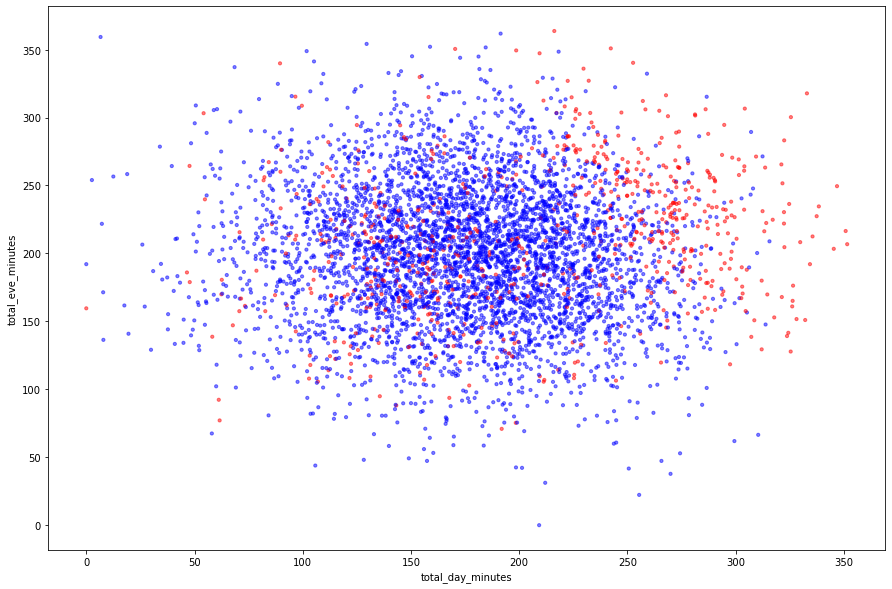

In [104]:
graph = data.plot.scatter(
    attribute1,
    attribute2,
    c = colors,
    s = 10,
    marker = 'o',
    alpha = 0.5,
    figsize = (15,10)
)

plt.show

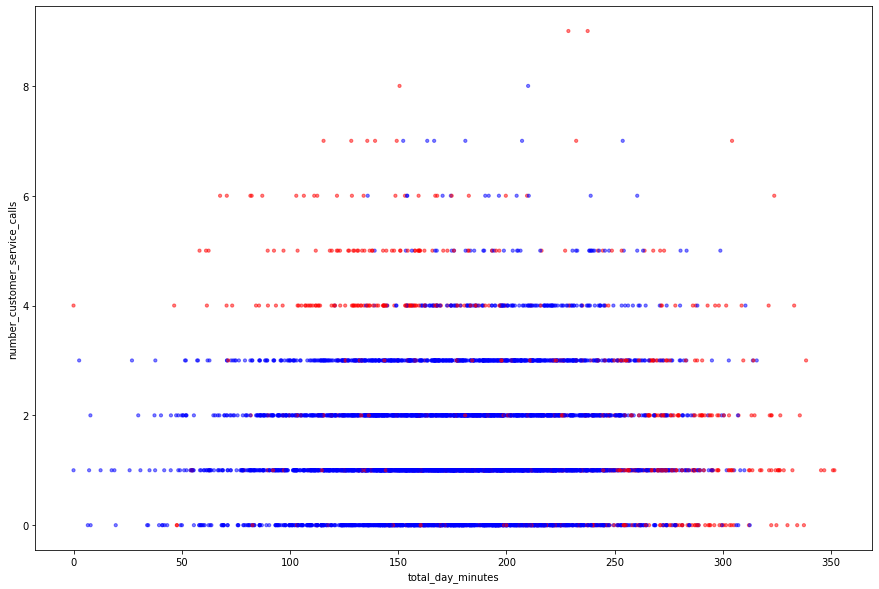

In [105]:
attribute1 = 'total_day_minutes'
attribute2 = 'number_customer_service_calls'
colors = ['red' if x else 'blue' for x in data['churned']]

graph = data.plot.scatter(
    attribute1,
    attribute2,
    c = colors,
    s = 10,
    marker = 'o',
    alpha = 0.5,
    figsize = (15,10)
)

In [106]:
selected_attributes = [
    #'account_length',
    'intl_plan', 
    'voice_mail_plan',
    'number_vmail_messages', 
    'total_day_minutes', 
    #'total_day_calls',
    'total_day_charge', 
    'total_eve_minutes', 
    #'total_eve_calls',
    'total_eve_charge', 
    'total_night_minutes', 
    #'total_night_calls',
    'total_night_charge', 
    'total_intl_minutes', 
    'total_intl_calls',
    'total_intl_charge', 
    'number_customer_service_calls', 
    #'area_code_408', 
    #'area_code_415', 
    #'area_code_510',
    'churned'
]

target = 'churned'

data = data[selected_attributes]

In [107]:
# shuffle dataframe to ensure there is no selection bias to training and testing samples

shuffled_data = data.sample(frac=1,random_state=2308)

In [108]:
# create x and y to separate attributes and target

x = shuffled_data.loc[:,shuffled_data.columns!='churned'].values
y = shuffled_data.loc[:,shuffled_data.columns=='churned'].values

In [109]:
# separate x and y in test and train

# size of training set
nt = 4000

x_train = x[:nt,:]
y_train = y[:nt].ravel()


x_test = x[nt:,:]
y_test = y[nt:].ravel()

In [110]:
# adjust scale of training and testing attributes

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

In [111]:
# train a KNN classifier with the training set

classifier = KNeighborsClassifier(n_neighbors=5)

classifier = classifier.fit(x_train,y_train)

In [112]:
y_train_answers = classifier.predict(x_train)

y_test_answers = classifier.predict(x_test)

In [113]:
# check the accuracy of the classifier

print ("\nPERFORMANCE IN TRAINING SET\n")

total   = len(y_train)
correct = sum(y_train_answers==y_train)
errors   = sum(y_train_answers!=y_train)

print ("Total of samples: " , total)
print ("Correct Answers:" , correct)
print ("Wrong Answers: " , errors)

accuracy = correct / total

print ("Accuracy = %.1f %%" % (100*accuracy))

print ("\nPERFORMANCE OUTSIDE THE TRAINING SAMPLE\n")

total   = len(y_test)
correct = sum(y_test_answers==y_test)
errors   = sum(y_test_answers!=y_test)

print ("Total of samples: " , total)
print ("Correct Answers:" , correct)
print ("Wrong Answers: " , errors)

accuracy = correct / total

print ("Accuracy = %.1f %%" % (100*accuracy))



PERFORMANCE IN TRAINING SET

Total of samples:  4000
Correct Answers: 3776
Wrong Answers:  224
Accuracy = 94.4 %

PERFORMANCE OUTSIDE THE TRAINING SAMPLE

Total of samples:  1000
Correct Answers: 916
Wrong Answers:  84
Accuracy = 91.6 %


In [114]:
# Verify the variation of accuracy depending on K


print ( "\n  K TRAIN  TEST")
print ( " -- ------ ------")

for k in range(1,50,2):

    classifier = KNeighborsClassifier(
        n_neighbors = k,
        weights     = 'uniform',
        p           = 1
        )
    classifier = classifier.fit(x_train,y_train)

    y_train_answer = classifier.predict(x_train)
    y_test_answer  = classifier.predict(x_test)
    
    train_accuracy = sum(y_train_answer==y_train)/len(y_train)
    test_accuracy  = sum(y_test_answer ==y_test) /len(y_test)
    
    print(
        "%3d"%k,
        "%6.1f" % (100*train_accuracy),
        "%6.1f" % (100*test_accuracy)
        )


  K TRAIN  TEST
 -- ------ ------
  1  100.0   89.4
  3   95.3   91.2
  5   94.3   90.6
  7   93.8   91.0
  9   93.3   91.2
 11   93.1   90.4
 13   92.6   90.3
 15   92.2   90.5
 17   92.0   90.3
 19   92.1   90.4
 21   92.0   90.4
 23   91.8   90.5
 25   91.3   90.3
 27   91.1   90.2
 29   91.0   89.5
 31   90.9   89.7
 33   90.7   89.8
 35   90.7   89.8
 37   90.5   89.8
 39   90.3   89.7
 41   90.2   89.5
 43   90.0   89.6
 45   90.0   89.3
 47   89.8   89.3
 49   89.7   89.1
